In [7]:
%matplotlib inline
import pandas as pd

In [8]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [9]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,Kaakan,2015
1,Die Welt in Flammen. 2. Teil,1923
2,The Three Passions,1928
3,I Love Desi,2015
4,Tales of Mystery and Imagination,2009


In [10]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [11]:
# What are the ten most common movie names of all time?

titles.title.value_counts().head(10)

title
Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Temptation              11
The Three Musketeers    11
Freedom                 11
Othello                 11
Maya                    11
Love                    10
Name: count, dtype: int64

In [12]:
# Which three years of the 1930s saw the most films released?

t = titles
t = t[t.year // 10 == 193]
t.year.value_counts().head(3)

year
1937    1217
1938    1161
1936    1153
Name: count, dtype: int64

<Axes: xlabel='year'>

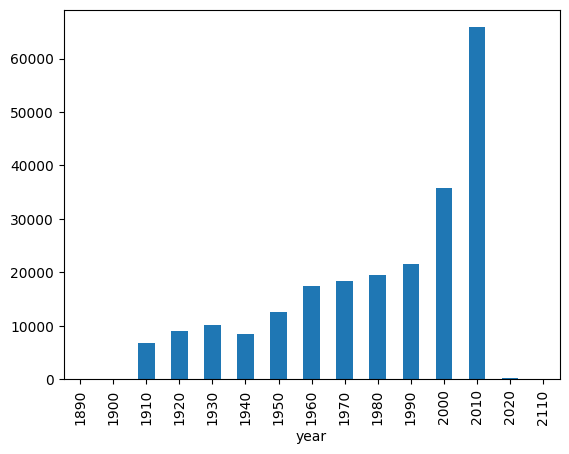

In [13]:
# Plot the number of films that have been released each decade
# over the history of cinema.

t = titles
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='year'>

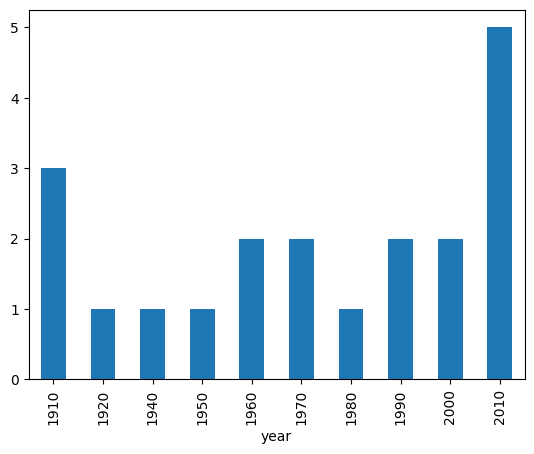

In [14]:
# Plot the number of "Hamlet" films made each decade.

t = titles
t = t[t.title == 'Hamlet']
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='year'>

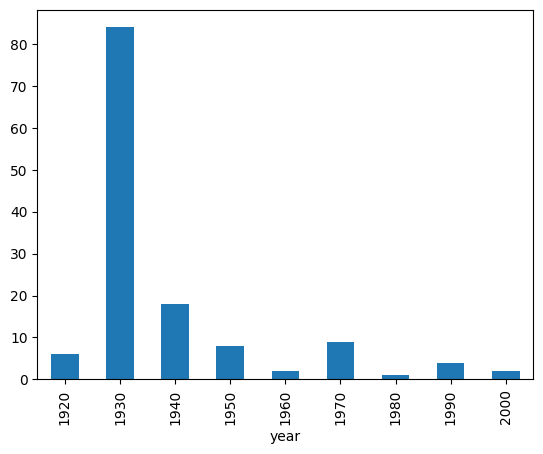

In [15]:
# Plot the number of "Rustler" characters
# in each decade of the history of film.

c = cast
c = c[c.character == 'Rustler']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='year'>

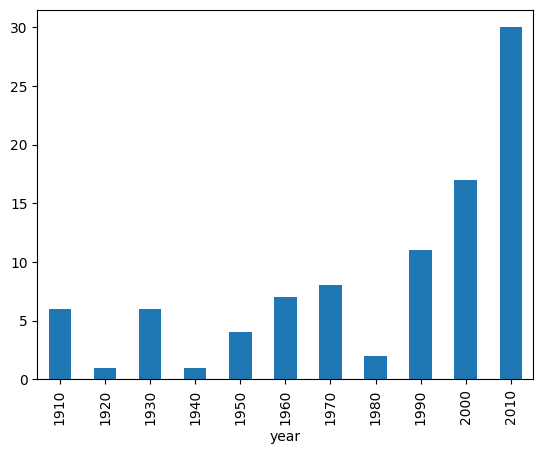

In [16]:
# Plot the number of "Hamlet" characters each decade.

c = cast
c = c[c.character == 'Hamlet']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

In [17]:
# What are the 11 most common character names in movie history?

cast.character.value_counts().head(11)

character
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Minor Role      6203
Name: count, dtype: int64

In [18]:
# Who are the 10 people most often credited as "Herself" in film history?

c = cast
c[c.character == 'Herself'].name.value_counts().head(10)

name
Queen Elizabeth II           11
Luisa Horga                   9
María Luisa (V) Martín        9
Hillary Clinton               8
Joyce Brothers                8
Margaret Thatcher             8
Marilyn Monroe                6
María Isabel (III) Martín     6
Rekha                         6
Joan Rivers                   6
Name: count, dtype: int64

In [19]:
# Who are the 10 people most often credited as "Himself" in film history?

c = cast
c[c.character == 'Himself'].name.value_counts().head(10)

name
Adolf Hitler          91
Richard Nixon         43
Ronald Reagan         37
John F. Kennedy       35
Winston Churchill     24
George W. Bush        24
Martin Luther King    23
Bill Clinton          22
Benito Mussolini      21
Ron Jeremy            20
Name: count, dtype: int64

In [20]:
# Which actors or actresses appeared in the most movies in the year 1945?

cast[cast.year == 1945].name.value_counts().head(10)

name
Emmett Vogan       37
Sam (II) Harris    31
Harold Miller      28
Bess Flowers       28
Franklyn Farnum    27
Nolan Leary        26
Herman Hack        25
Larry Steers       25
Frank O'Connor     24
Tom London         24
Name: count, dtype: int64

In [21]:
# Which actors or actresses appeared in the most movies in the year 1985?

cast[cast.year == 1985].name.value_counts().head(10)

name
Mammootty        22
Sukumari         20
Shakti Kapoor    19
Raj Babbar       15
Lou Scheimer     15
Mohanlal         15
Asrani           13
Aruna Irani      13
Om Shivpuri      13
Rajesh Khanna    13
Name: count, dtype: int64

<Axes: xlabel='year'>

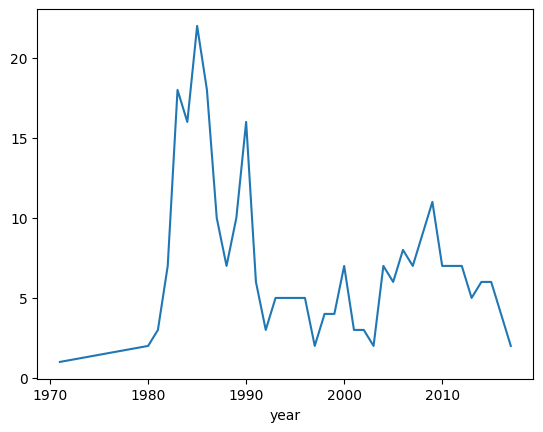

In [22]:
# Plot how many roles Mammootty has played in each year of his career.

cast[cast.name == 'Mammootty'].year.value_counts().sort_index().plot()

In [24]:
# What are the 10 most frequent roles that start with the phrase "Patron in"?

c = cast
c[(c.character.str.startswith('Patron in ')) & c.character.notnull()].character.value_counts().head(10)

character
Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       8
Patron in Billiard Parlor        5
Patron in Club                   3
Patron in Restaurant             3
Patron in cabaret                3
Patron in restaurant             3
Patron in Bar                    3
Patron in Quiet Bar              2
Name: count, dtype: int64

In [26]:
# What are the 10 most frequent roles that start with the word "Science"?

c = cast
c[(c.character.str.startswith('Science')) & c.character.notnull()].character.value_counts().head(10)

character
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Reporter         5
Science Fair Kid         5
Science Kid              5
Science                  4
Science Fair Teacher     3
Science teacher          3
Name: count, dtype: int64

<Axes: xlabel='year', ylabel='n'>

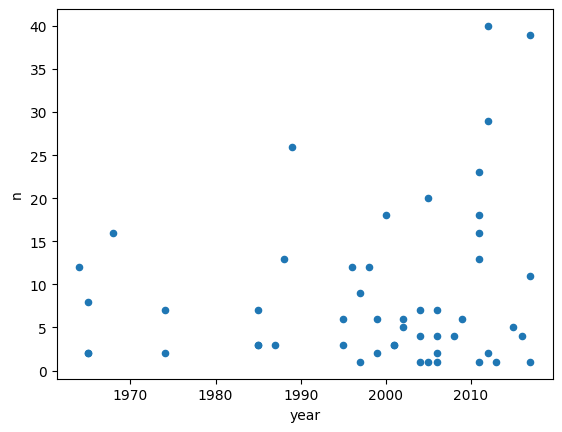

In [27]:
# Plot the n-values of the roles that Judi Dench has played over her career.

c = cast
c = c[c.name == 'Judi Dench']
c.plot(x='year', y='n', kind='scatter')

<Axes: xlabel='year', ylabel='n'>

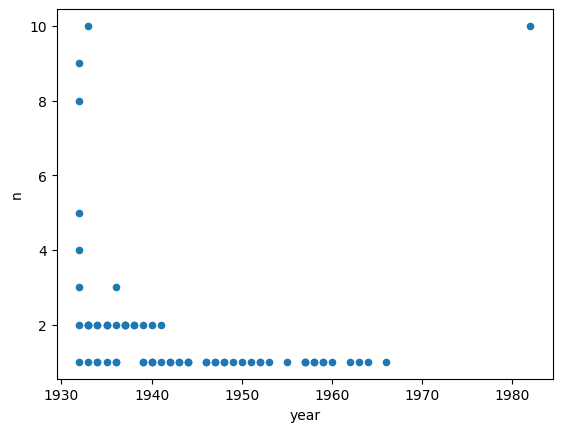

In [28]:
# Plot the n-values of Cary Grant's roles through his career.

c = cast
c = c[c.name == 'Cary Grant'].sort_values('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

In [ ]:
# Plot the n-value of the roles that Sidney Poitier has acted
# over the years.

c = cast
c = c[c.name == 'Sidney Poitier'].sort_values('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

In [29]:
# How many leading (n=1) roles were available to actors,
# and how many to actresses, in the 1950s?

c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.type.value_counts()

type
actor      6482
actress    2985
Name: count, dtype: int64

In [30]:
# How many supporting (n=2) roles were available to actors,
# and how many to actresses, in the 1950s?

c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 2]
c.type.value_counts()

type
actor      4520
actress    4496
Name: count, dtype: int64